# **Fortune 500 Companies**

# **Overview**
This project is to visualize the density of the fortune 500 companies in US by states. 

**Data Preprocessing**

In [0]:
!pip install squarify
# Data Manipulation
import pandas as pd
# Treemap Ploting
import squarify
# Matplotlib and Seaborn imports
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
# Activate Seaborn
sns.set()
%matplotlib inline
# Large Plot
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# Use ggplot style
style.use('ggplot')

In [0]:
fortune = pd.read_csv("https://raw.githubusercontent.com/pssguy/fortune500/master/fortune500.csv")
fortune.head()

,lon,lat,company,location,industry,state,city
0,-94.2088,36.3729,Walmart,"Bentonville, AR",General Merchandisers,AR,Bentonville
1,-96.9489,32.8140,Exxon Mobil,"Irving, TX",Petroleum Refining,TX,Irving
2,-121.9780,37.7799,Chevron,"San Ramon, CA",Petroleum Refining,CA,San Ramon
3,-95.9980,41.2524,Berkshire Hathaway,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
4,-122.0320,37.3230,Apple,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino


In [0]:
agg = pd.DataFrame(fortune.groupby(["state"], as_index=False)["company"].count().sort_values(by='company', ascending=False))
agg.head()

,state,company
39,TX,107
3,CA,101
30,NY,98
13,IL,63
31,OH,55


**Visualization**


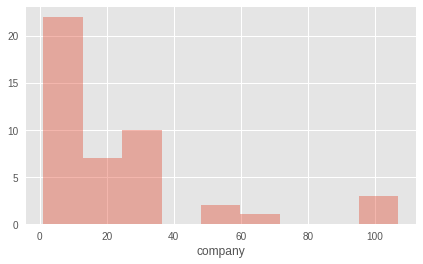

In [0]:
plt.figure(figsize = (7,4))

sns.distplot(agg.company,kde=False);


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


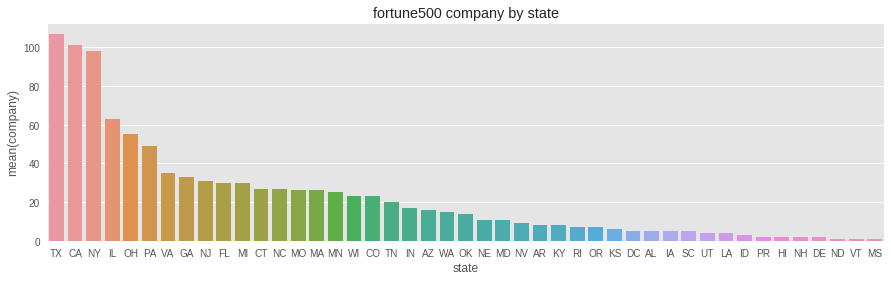

In [0]:
plt.figure(figsize = (15,4))
sns.barplot(x=agg["state"], y=agg["company"], data=agg).set_title("fortune500 company by state")


plt.show()

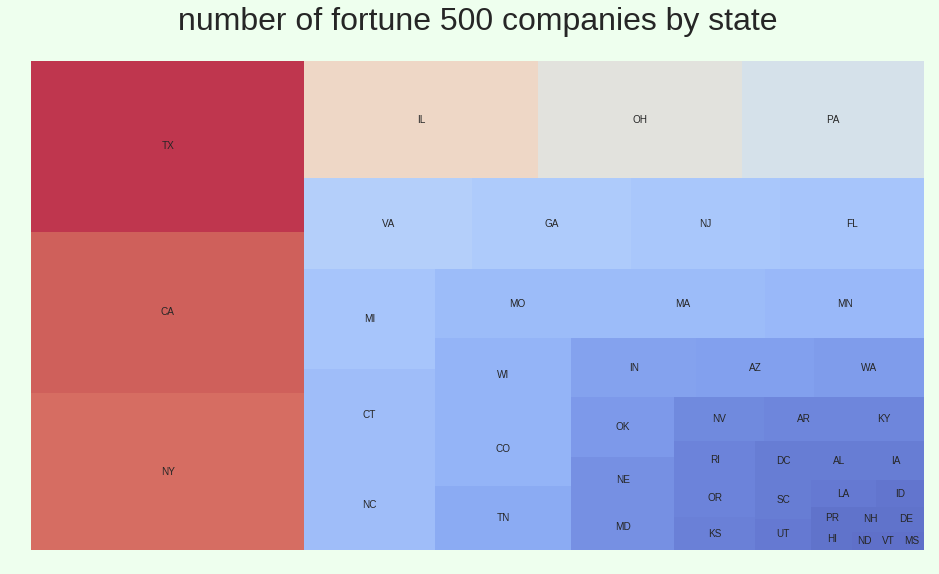

In [0]:
# Get Axis and Figure
fig, ax = plt.subplots()
# Our Colormap
cmap = matplotlib.cm.coolwarm
# Min and Max Values
mini = min(agg["company"])
maxi = max(agg["company"])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in agg["company"]]
# Plotting
squarify.plot(sizes=agg["company"], label=agg["state"], alpha=0.8, color=colors)
# Removing Axis
plt.axis('off')
# Invert Y-Axis
plt.gca().invert_yaxis()
# Title
plt.title("number of fortune 500 companies by state", fontsize=32)
# Title Positioning
ttl = ax.title
ttl.set_position([.5, 1.05])
# BG Color
fig.set_facecolor('#eeffee')